In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng0/predictions_new.csv"

data = pd.read_csv(file_path)

# Extract frame filenames
frames = data.iloc[2:, 0].values

# Extract keypoints and their corresponding columns
keypoints_with_cols = {
    'paw1LH_top': ('heatmap_tracker', 'heatmap_tracker.1', 'heatmap_tracker.2'),
    'paw2LF_top': ('heatmap_tracker.3', 'heatmap_tracker.4', 'heatmap_tracker.5'),
    'paw3RF_top': ('heatmap_tracker.6', 'heatmap_tracker.7', 'heatmap_tracker.8'),
    'paw4RH_top': ('heatmap_tracker.9', 'heatmap_tracker.10', 'heatmap_tracker.11'),
    'tail_base_top': ('heatmap_tracker.15', 'heatmap_tracker.16', 'heatmap_tracker.17'),
    'tail_mid_top': ('heatmap_tracker.18', 'heatmap_tracker.19', 'heatmap_tracker.20'),
    'tail_end_top': ('heatmap_tracker.21', 'heatmap_tracker.22', 'heatmap_tracker.23'),
    'nose_bot': ('heatmap_tracker.42', 'heatmap_tracker.43', 'heatmap_tracker.44')
}

# Prepare the list to hold new structured data
new_data = []

# Iterate over each frame and each keypoint to create the new structure
for i, frame in enumerate(frames):
    for keypoint, (x_col, y_col, likelihood_col) in keypoints_with_cols.items():
        new_row = {
            'frame': frame,
            'keypoint': keypoint,
            'x': pd.to_numeric(data[x_col].iloc[2 + i], errors='coerce'),
            'y': pd.to_numeric(data[y_col].iloc[2 + i], errors='coerce'),
            'likelihood': pd.to_numeric(data[likelihood_col].iloc[2 + i], errors='coerce')
        }
        new_data.append(new_row)

# Create a new DataFrame from the structured data
new_df = pd.DataFrame(new_data)
new_df

,frame,keypoint,x,y,likelihood
0,labeled-data/180607_004/img015278.png,paw1LH_top,145.031677,95.310852,0.904747
1,labeled-data/180607_004/img015278.png,paw2LF_top,247.722275,94.560287,0.996503
2,labeled-data/180607_004/img015278.png,paw3RF_top,265.542480,89.333633,0.969812
3,labeled-data/180607_004/img015278.png,paw4RH_top,148.442825,105.648239,0.999965
4,labeled-data/180607_004/img015278.png,tail_base_top,25.818769,20.363697,0.999940
...,...,...,...,...,...
2019,labeled-data/180623_000/img107274.png,paw4RH_top,181.267334,97.296921,0.971233
2020,labeled-data/180623_000/img107274.png,tail_base_top,23.581369,31.467033,0.817335
2021,labeled-data/180623_000/img107274.png,tail_mid_top,386.377472,22.529795,0.999889
2022,labeled-data/180623_000/img107274.png,tail_end_top,195.017700,200.619598,0.995964


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_file(file_path, rng_label):
    data = pd.read_csv(file_path)
    
    # Extract frame filenames
    frames = data.iloc[2:, 0].values

    # Prepare the list to hold new structured data
    new_data = []

    # Extract keypoints and their corresponding columns
    keypoints_with_cols = {
        'paw1LH_top': ('heatmap_tracker', 'heatmap_tracker.1', 'heatmap_tracker.2'),
        'paw2LF_top': ('heatmap_tracker.3', 'heatmap_tracker.4', 'heatmap_tracker.5'),
        'paw3RF_top': ('heatmap_tracker.6', 'heatmap_tracker.7', 'heatmap_tracker.8'),
        'paw4RH_top': ('heatmap_tracker.9', 'heatmap_tracker.10', 'heatmap_tracker.11'),
        'tail_base_top': ('heatmap_tracker.15', 'heatmap_tracker.16', 'heatmap_tracker.17'),
        'tail_mid_top': ('heatmap_tracker.18', 'heatmap_tracker.19', 'heatmap_tracker.20'),
        'tail_end_top': ('heatmap_tracker.21', 'heatmap_tracker.22', 'heatmap_tracker.23'),
        'nose_bot': ('heatmap_tracker.42', 'heatmap_tracker.43', 'heatmap_tracker.44')
    }

    # Iterate over each frame and each keypoint to create the new structure
    for i, frame in enumerate(frames):
        for keypoint, (x_col, y_col, likelihood_col) in keypoints_with_cols.items():
            new_row = {
                'frame': frame,
                'keypoint': keypoint,
                f'x_{rng_label}': pd.to_numeric(data[x_col].iloc[2 + i], errors='coerce'),
                f'y_{rng_label}': pd.to_numeric(data[y_col].iloc[2 + i], errors='coerce'),
                f'likelihood_{rng_label}': pd.to_numeric(data[likelihood_col].iloc[2 + i], errors='coerce')
            }
            new_data.append(new_row)

    # Create a new DataFrame from the structured data
    return pd.DataFrame(new_data)

# File paths for the different RNG results
file_paths = {
    'rng0': "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng0/predictions_new.csv",
    'rng1': "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng1/predictions_new.csv",
    'rng2': "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng2/predictions_new.csv",
    'rng3': "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng3/predictions_new.csv",
    'rng4': "/teamspace/studios/this_studio/outputs/mirror-mouse/hand=100_pseudo=1000/results_amortized_eks/rng4/predictions_new.csv"
}

# Process each file
dfs = [process_file(path, label) for label, path in file_paths.items()]

# Merge the dataframes on 'frame' and 'keypoint'
final_df = dfs[0]
for df in dfs[1:]:
    final_df = final_df.merge(df, on=['frame', 'keypoint'], how='outer')
final_df
# Display the merged DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Merged DataFrame", dataframe=final_df)

,frame,keypoint,x_rng0,y_rng0,likelihood_rng0,x_rng1,y_rng1,likelihood_rng1,x_rng2,y_rng2,likelihood_rng2,x_rng3,y_rng3,likelihood_rng3,x_rng4,y_rng4,likelihood_rng4
0,labeled-data/180607_004/img015278.png,paw1LH_top,145.031677,95.310852,0.904747,149.657623,105.391739,0.996796,149.896774,105.202751,0.998097,151.451065,100.663475,0.973210,149.778214,102.161652,0.973978
1,labeled-data/180607_004/img015278.png,paw2LF_top,247.722275,94.560287,0.996503,245.405518,93.332901,0.883694,248.907211,96.021584,0.994604,243.627579,95.781601,0.982318,254.013153,93.285965,0.984759
2,labeled-data/180607_004/img015278.png,paw3RF_top,265.542480,89.333633,0.969812,260.083313,94.540672,0.977216,264.246887,90.300064,0.964964,253.330551,93.457054,0.994434,264.015808,88.901207,0.986512
3,labeled-data/180607_004/img015278.png,paw4RH_top,148.442825,105.648239,0.999965,145.463974,103.757980,0.989199,146.444199,104.761398,0.999115,147.233795,104.621628,0.999109,145.852905,105.243683,0.997927
4,labeled-data/180607_004/img015278.png,tail_base_top,25.818769,20.363697,0.999940,28.508158,20.460766,0.998985,30.795561,21.335272,0.998157,28.757515,20.582594,0.999914,30.004793,21.144650,0.997957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,labeled-data/180623_000/img107274.png,paw4RH_top,181.267334,97.296921,0.971233,181.811844,99.296082,0.999986,182.939148,95.681854,0.991704,183.508392,95.557877,0.978743,171.943390,93.613029,0.986323
2020,labeled-data/180623_000/img107274.png,tail_base_top,23.581369,31.467033,0.817335,22.495674,25.637789,0.980640,22.549463,14.670479,0.945610,20.787397,34.405552,0.936835,20.394201,36.329853,0.995551
2021,labeled-data/180623_000/img107274.png,tail_mid_top,386.377472,22.529795,0.999889,386.431793,22.306257,0.999973,386.531097,20.411442,0.999993,386.721375,22.431902,0.999989,386.691406,23.310808,0.999998
2022,labeled-data/180623_000/img107274.png,tail_end_top,195.017700,200.619598,0.995964,194.514725,199.304794,0.999639,195.473663,200.003479,0.998394,194.780014,198.972015,0.991581,194.989975,199.846191,0.999693


In [7]:


# Compute ensemble mean, number of networks with likelihood > 0.9, and ensemble variance
final_df['ensemble_mean_x'] = final_df[[f'x_rng{i}' for i in range(5)]].mean(axis=1)
final_df['ensemble_mean_y'] = final_df[[f'y_rng{i}' for i in range(5)]].mean(axis=1)
final_df['ensemble_variance_x'] = final_df[[f'x_rng{i}' for i in range(5)]].var(axis=1)
final_df['ensemble_variance_y'] = final_df[[f'y_rng{i}' for i in range(5)]].var(axis=1)

final_df['num_likelihood_above_0.9'] = final_df[[f'likelihood_rng{i}' for i in range(5)]].gt(0.9).sum(axis=1)


In [8]:
final_df

,frame,keypoint,x_rng0,y_rng0,likelihood_rng0,x_rng1,y_rng1,likelihood_rng1,x_rng2,y_rng2,...,y_rng3,likelihood_rng3,x_rng4,y_rng4,likelihood_rng4,ensemble_mean_x,ensemble_mean_y,ensemble_variance_x,ensemble_variance_y,num_likelihood_above_0.9
0,labeled-data/180607_004/img015278.png,paw1LH_top,145.031677,95.310852,0.904747,149.657623,105.391739,0.996796,149.896774,105.202751,...,100.663475,0.973210,149.778214,102.161652,0.973978,149.163071,101.746094,5.866158,16.999074,5
1,labeled-data/180607_004/img015278.png,paw2LF_top,247.722275,94.560287,0.996503,245.405518,93.332901,0.883694,248.907211,96.021584,...,95.781601,0.982318,254.013153,93.285965,0.984759,247.935147,94.596468,15.721638,1.687706,4
2,labeled-data/180607_004/img015278.png,paw3RF_top,265.542480,89.333633,0.969812,260.083313,94.540672,0.977216,264.246887,90.300064,...,93.457054,0.994434,264.015808,88.901207,0.986512,261.443808,91.306526,24.736859,6.443826,5
3,labeled-data/180607_004/img015278.png,paw4RH_top,148.442825,105.648239,0.999965,145.463974,103.757980,0.989199,146.444199,104.761398,...,104.621628,0.999109,145.852905,105.243683,0.997927,146.687540,104.806586,1.408091,0.508815,5
4,labeled-data/180607_004/img015278.png,tail_base_top,25.818769,20.363697,0.999940,28.508158,20.460766,0.998985,30.795561,21.335272,...,20.582594,0.999914,30.004793,21.144650,0.997957,28.776959,20.777396,3.601462,0.188862,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,labeled-data/180623_000/img107274.png,paw4RH_top,181.267334,97.296921,0.971233,181.811844,99.296082,0.999986,182.939148,95.681854,...,95.557877,0.978743,171.943390,93.613029,0.986323,180.294022,96.289153,22.578261,4.530607,5
2020,labeled-data/180623_000/img107274.png,tail_base_top,23.581369,31.467033,0.817335,22.495674,25.637789,0.980640,22.549463,14.670479,...,34.405552,0.936835,20.394201,36.329853,0.995551,21.961621,28.502141,1.772490,76.108329,4
2021,labeled-data/180623_000/img107274.png,tail_mid_top,386.377472,22.529795,0.999889,386.431793,22.306257,0.999973,386.531097,20.411442,...,22.431902,0.999989,386.691406,23.310808,0.999998,386.550629,22.198041,0.023365,1.151662,5
2022,labeled-data/180623_000/img107274.png,tail_end_top,195.017700,200.619598,0.995964,194.514725,199.304794,0.999639,195.473663,200.003479,...,198.972015,0.991581,194.989975,199.846191,0.999693,194.955215,199.749216,0.124657,0.408293,5


In [9]:
def confidence_flag(row):
    if row['num_likelihood_above_0.9'] == 5:
        return 'All 5 networks highly confident'
    elif row['num_likelihood_above_0.9'] == 4:
        return '4/5 networks highly confident'
    elif row['num_likelihood_above_0.9'] == 3:
        return '3/5 networks confident'
    elif row['num_likelihood_above_0.9'] == 2:
        return '2/5 networks confident'
    elif row['num_likelihood_above_0.9'] == 1:
        return '1/5 network confident'
    else:
        return 'No networks confident'

# Apply the function to create the new column
final_df['confidence_flag'] = final_df.apply(confidence_flag, axis=1)
final_df

,frame,keypoint,x_rng0,y_rng0,likelihood_rng0,x_rng1,y_rng1,likelihood_rng1,x_rng2,y_rng2,...,likelihood_rng3,x_rng4,y_rng4,likelihood_rng4,ensemble_mean_x,ensemble_mean_y,ensemble_variance_x,ensemble_variance_y,num_likelihood_above_0.9,confidence_flag
0,labeled-data/180607_004/img015278.png,paw1LH_top,145.031677,95.310852,0.904747,149.657623,105.391739,0.996796,149.896774,105.202751,...,0.973210,149.778214,102.161652,0.973978,149.163071,101.746094,5.866158,16.999074,5,All 5 networks highly confident
1,labeled-data/180607_004/img015278.png,paw2LF_top,247.722275,94.560287,0.996503,245.405518,93.332901,0.883694,248.907211,96.021584,...,0.982318,254.013153,93.285965,0.984759,247.935147,94.596468,15.721638,1.687706,4,4/5 networks highly confident
2,labeled-data/180607_004/img015278.png,paw3RF_top,265.542480,89.333633,0.969812,260.083313,94.540672,0.977216,264.246887,90.300064,...,0.994434,264.015808,88.901207,0.986512,261.443808,91.306526,24.736859,6.443826,5,All 5 networks highly confident
3,labeled-data/180607_004/img015278.png,paw4RH_top,148.442825,105.648239,0.999965,145.463974,103.757980,0.989199,146.444199,104.761398,...,0.999109,145.852905,105.243683,0.997927,146.687540,104.806586,1.408091,0.508815,5,All 5 networks highly confident
4,labeled-data/180607_004/img015278.png,tail_base_top,25.818769,20.363697,0.999940,28.508158,20.460766,0.998985,30.795561,21.335272,...,0.999914,30.004793,21.144650,0.997957,28.776959,20.777396,3.601462,0.188862,5,All 5 networks highly confident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,labeled-data/180623_000/img107274.png,paw4RH_top,181.267334,97.296921,0.971233,181.811844,99.296082,0.999986,182.939148,95.681854,...,0.978743,171.943390,93.613029,0.986323,180.294022,96.289153,22.578261,4.530607,5,All 5 networks highly confident
2020,labeled-data/180623_000/img107274.png,tail_base_top,23.581369,31.467033,0.817335,22.495674,25.637789,0.980640,22.549463,14.670479,...,0.936835,20.394201,36.329853,0.995551,21.961621,28.502141,1.772490,76.108329,4,4/5 networks highly confident
2021,labeled-data/180623_000/img107274.png,tail_mid_top,386.377472,22.529795,0.999889,386.431793,22.306257,0.999973,386.531097,20.411442,...,0.999989,386.691406,23.310808,0.999998,386.550629,22.198041,0.023365,1.151662,5,All 5 networks highly confident
2022,labeled-data/180623_000/img107274.png,tail_end_top,195.017700,200.619598,0.995964,194.514725,199.304794,0.999639,195.473663,200.003479,...,0.991581,194.989975,199.846191,0.999693,194.955215,199.749216,0.124657,0.408293,5,All 5 networks highly confident


/tmp/ipykernel_3850/3571114990.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = final_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin']).size().unstack(fill_value=0)


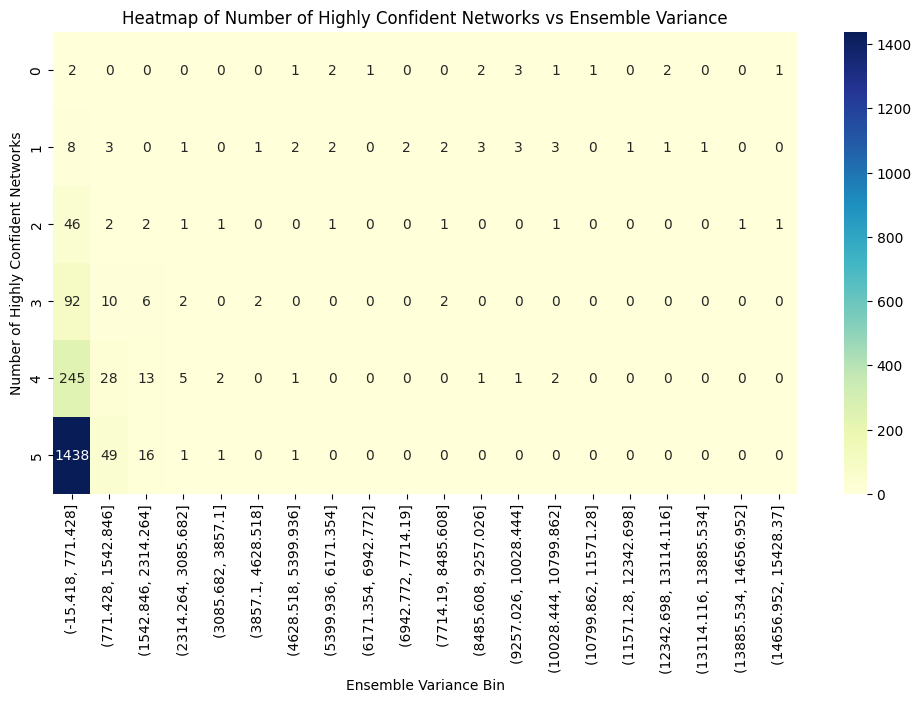

In [30]:
# Bin the ensemble variance for the heatmap
final_df['ensemble_variance_bin'] = pd.cut(final_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1), bins=20)

# Prepare the data for the heatmap
heatmap_data = final_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Number of Highly Confident Networks vs Ensemble Variance")
plt.xlabel("Ensemble Variance Bin")
plt.ylabel("Number of Highly Confident Networks")
plt.show()

/tmp/ipykernel_3850/2283292813.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ensemble_variance_bin'] = pd.cut(filtered_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1), bins=10)
/tmp/ipykernel_3850/2283292813.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_filtered = filtered_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin']).size().unstack(fill_value=0)


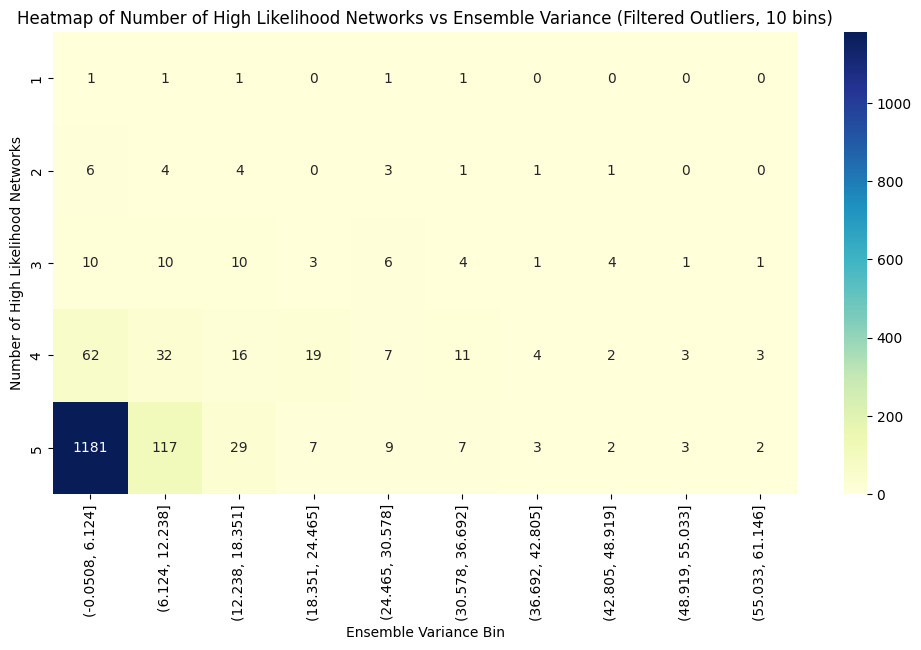

In [11]:
# Calculate the IQR for the ensemble variance
ensemble_variance_mean = final_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1)
Q1 = ensemble_variance_mean.quantile(0.25)
Q3 = ensemble_variance_mean.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = final_df[(ensemble_variance_mean >= lower_bound) & (ensemble_variance_mean <= upper_bound)]

# Bin the ensemble variance with 10 bins (original setting)
filtered_df['ensemble_variance_bin'] = pd.cut(filtered_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1), bins=10)

# Prepare the data for the heatmap
heatmap_data_filtered = filtered_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_filtered, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Number of High Likelihood Networks vs Ensemble Variance (Filtered Outliers, 10 bins)")
plt.xlabel("Ensemble Variance Bin")
plt.ylabel("Number of High Likelihood Networks")
plt.show()


/tmp/ipykernel_3850/1985508712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ensemble_variance_bin_20'] = pd.cut(filtered_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1), bins=20)
/tmp/ipykernel_3850/1985508712.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_filtered_20 = filtered_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin_20']).size().unstack(fill_value=0)


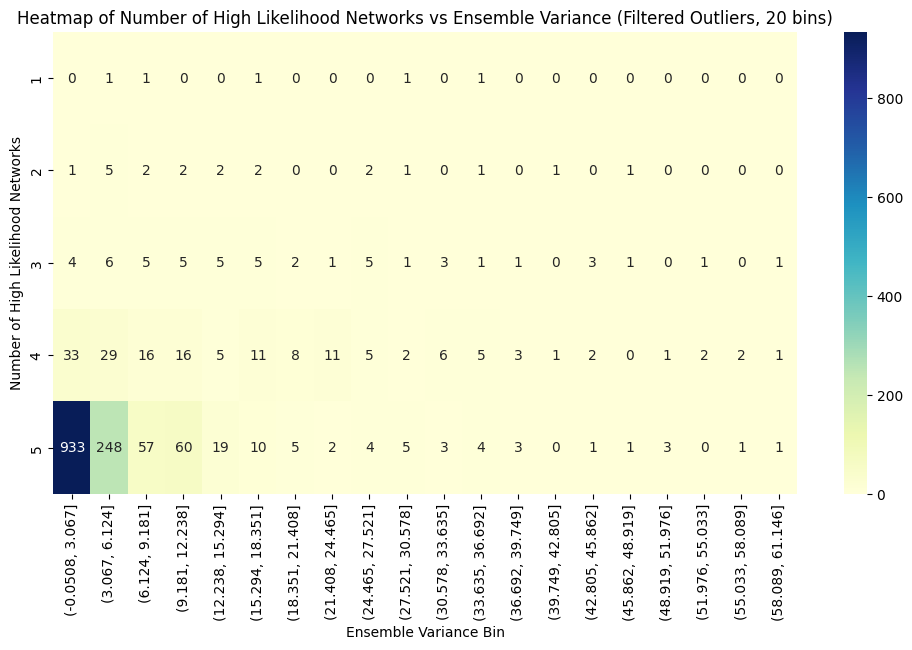

In [12]:
# Bin the ensemble variance with 20 bins
filtered_df['ensemble_variance_bin_20'] = pd.cut(filtered_df[['ensemble_variance_x', 'ensemble_variance_y']].mean(axis=1), bins=20)

# Prepare the data for the heatmap with 20 bins
heatmap_data_filtered_20 = filtered_df.groupby(['num_likelihood_above_0.9', 'ensemble_variance_bin_20']).size().unstack(fill_value=0)

# Plot the heatmap with 20 bins
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_filtered_20, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Number of High Likelihood Networks vs Ensemble Variance (Filtered Outliers, 20 bins)")
plt.xlabel("Ensemble Variance Bin")
plt.ylabel("Number of High Likelihood Networks")
plt.show()


In [14]:
heatmap_data_filtered_20

ensemble_variance_bin_20,"(-0.0508, 3.067]","(3.067, 6.124]","(6.124, 9.181]","(9.181, 12.238]","(12.238, 15.294]","(15.294, 18.351]","(18.351, 21.408]","(21.408, 24.465]","(24.465, 27.521]","(27.521, 30.578]","(30.578, 33.635]","(33.635, 36.692]","(36.692, 39.749]","(39.749, 42.805]","(42.805, 45.862]","(45.862, 48.919]","(48.919, 51.976]","(51.976, 55.033]","(55.033, 58.089]","(58.089, 61.146]"
num_likelihood_above_0.9,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,1,5,2,2,2,2,0,0,2,1,0,1,0,1,0,1,0,0,0,0
3,4,6,5,5,5,5,2,1,5,1,3,1,1,0,3,1,0,1,0,1
4,33,29,16,16,5,11,8,11,5,2,6,5,3,1,2,0,1,2,2,1
5,933,248,57,60,19,10,5,2,4,5,3,4,3,0,1,1,3,0,1,1


In [23]:
heatmap_values = heatmap_data_filtered_20.values

# Summing all the values
total_points = heatmap_values.sum()

# Identifying the bottom-left corner value manually
bottom_left_corner_points = heatmap_values[-1, 0]  # Assuming bottom-left is the first row and last column
bottom_left_corner_points

# # Calculating points in other bins
# other_bins_points = total_points - bottom_left_corner_points

# total_points, bottom_left_corner_points, other_bins_points

933